In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from tpg.agent import Agent, loadAgent
from tpg.utils import pathDepths, actionInstructionStats, learnerInstructionStats, getLearners, getTeams
import gym
from numpy import append, clip
from math import sin, cos, pi
from copy import deepcopy
from IPython import display

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Run Type')
    
ops = ["ADD", "SUB", "MULT", "DIV", "NEG", "COS"]

In [2]:
gp1_agent = loadAgent("run-data/gp/1/agent.pkl")
gp2_agent = loadAgent("run-data/gp/2/agent.pkl")
gp3_agent = loadAgent("run-data/gp/3/agent.pkl") 
gp4_agent = loadAgent("run-data/gp/4/agent.pkl") # best 
gp5_agent = loadAgent("run-data/gp/5/agent.pkl")

tpgsbb1_agent = loadAgent("run-data/tpgsbb/1/agent.pkl")
tpgsbb2_agent = loadAgent("run-data/tpgsbb/2/agent.pkl")
tpgsbb3_agent = loadAgent("run-data/tpgsbb/3/agent.pkl") # best
tpgsbb4_agent = loadAgent("run-data/tpgsbb/4/agent.pkl")

# save scores over 1000 episodes
gp1 = pickle.load(open("run-data/gp/1/agent-scores.pkl", "rb"))
gp2 = pickle.load(open("run-data/gp/2/agent-scores.pkl", "rb"))
gp3 = pickle.load(open("run-data/gp/3/agent-scores.pkl", "rb"))
gp4 = pickle.load(open("run-data/gp/4/agent-scores.pkl", "rb"))
gp5 = pickle.load(open("run-data/gp/5/agent-scores.pkl", "rb"))
gp = gp1 + gp2 + gp3 + gp4 + gp5

tpgsbb1 = pickle.load(open("run-data/tpgsbb/1/agent-scores.pkl", "rb"))
tpgsbb2 = pickle.load(open("run-data/tpgsbb/2/agent-scores.pkl", "rb"))
tpgsbb3 = pickle.load(open("run-data/tpgsbb/3/agent-scores.pkl", "rb"))
tpgsbb4 = pickle.load(open("run-data/tpgsbb/4/agent-scores.pkl", "rb"))
tpgsbb = tpgsbb1 + tpgsbb2 + tpgsbb3 + tpgsbb4

/home/ryan/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


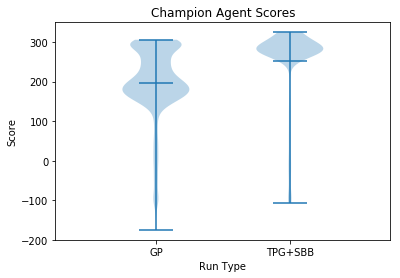

In [3]:
ax = plt.axes()

plt.violinplot((gp, tpgsbb), showmeans=True, points=3000)

plt.title("Champion Agent Scores")
plt.xlabel("Run Type")
plt.ylabel("Score")

set_axis_style(ax, ["GP", "TPG+SBB"])

plt.savefig("images/champs.pdf")
plt.show()

In [4]:
# check the structures of the different agents in various ways GP first
print("GP 1\n")

print("Scores:")
print(f"Mean Score: {np.mean(gp1)}")
print(f"Std Score: {np.std(gp1)}\n")

print("Structure:")
print(f"Act Instructions: {actionInstructionStats(getLearners(gp1_agent.team), ops)}")


print("\n\nGP 2\n")

print("Scores:")
print(f"Mean Score: {np.mean(gp2)}")
print(f"Std Score: {np.std(gp2)}\n")

print("Structure:")
print(f"Act Instructions: {actionInstructionStats(getLearners(gp2_agent.team), ops)}")


print("\n\nGP 3\n")

print("Scores:")
print(f"Mean Score: {np.mean(gp3)}")
print(f"Std Score: {np.std(gp3)}\n")

print("Structure:")
print(f"Act Instructions: {actionInstructionStats(getLearners(gp3_agent.team), ops)}")


print("\n\nGP 4\n")

print("Scores:")
print(f"Mean Score: {np.mean(gp4)}")
print(f"Std Score: {np.std(gp4)}\n")

print("Structure:")
print(f"Act Instructions: {actionInstructionStats(getLearners(gp4_agent.team), ops)}")


print("\n\nGP 5\n")

print("Scores:")
print(f"Mean Score: {np.mean(gp5)}")
print(f"Std Score: {np.std(gp5)}\n")

print("Structure:")
print(f"Act Instructions: {actionInstructionStats(getLearners(gp5_agent.team), ops)}")

GP 1

Scores:
Mean Score: 222.43189267069135
Std Score: 90.89765850078881

Structure:
Act Instructions: {'overall': {'total': 32, 'min': 32, 'max': 32, 'avg': 32.0}, 'ADD': {'total': 6, 'min': 6, 'max': 6, 'avg': 6.0}, 'SUB': {'total': 6, 'min': 6, 'max': 6, 'avg': 6.0}, 'MULT': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'DIV': {'total': 7, 'min': 7, 'max': 7, 'avg': 7.0}, 'NEG': {'total': 3, 'min': 3, 'max': 3, 'avg': 3.0}, 'COS': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'numActPrograms': 1}


GP 2

Scores:
Mean Score: 127.73228271608879
Std Score: 109.45911801408722

Structure:
Act Instructions: {'overall': {'total': 33, 'min': 33, 'max': 33, 'avg': 33.0}, 'ADD': {'total': 4, 'min': 4, 'max': 4, 'avg': 4.0}, 'SUB': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'MULT': {'total': 10, 'min': 10, 'max': 10, 'avg': 10.0}, 'DIV': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'NEG': {'total': 4, 'min': 4, 'max': 4, 'avg': 4.0}, 'COS': {'total': 5, 'min': 5, 'max': 5, 'avg': 5.0}, 'n

In [6]:
# TPG+SBB

print("TPG+SBB 1\n")

print("Scores:")
print(f"Mean Score: {np.mean(tpgsbb1)}")
print(f"Std Score: {np.std(tpgsbb1)}\n")

print("Structure:")
print(f"Teams: {len(getTeams(tpgsbb1_agent.team))}")
print(f"Learners: {len(getLearners(tpgsbb1_agent.team))}")
print(f"Path Depths: {pathDepths(tpgsbb1_agent.team)}")

print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpgsbb1_agent.team), ops)}")
print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpgsbb1_agent.team), ops)}")


print("\n\nTPG+SBB 2\n")

print("Scores:")
print(f"Mean Score: {np.mean(tpgsbb2)}")
print(f"Std Score: {np.std(tpgsbb2)}\n")

print("Structure:")
print(f"Teams: {len(getTeams(tpgsbb2_agent.team))}")
print(f"Learners: {len(getLearners(tpgsbb2_agent.team))}")
print(f"Path Depths: {pathDepths(tpgsbb2_agent.team)}")

print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpgsbb2_agent.team), ops)}")
print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpgsbb2_agent.team), ops)}")


print("\n\nTPG+SBB 3\n")

print("Scores:")
print(f"Mean Score: {np.mean(tpgsbb3)}")
print(f"Std Score: {np.std(tpgsbb3)}\n")

print("Structure:")
print(f"Teams: {len(getTeams(tpgsbb3_agent.team))}")
print(f"Learners: {len(getLearners(tpgsbb3_agent.team))}")
print(f"Path Depths: {pathDepths(tpgsbb3_agent.team)}")

print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpgsbb3_agent.team), ops)}")
print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpgsbb3_agent.team), ops)}")

print("\n\nTPG+SBB 4\n")

print("Scores:")
print(f"Mean Score: {np.mean(tpgsbb4)}")
print(f"Std Score: {np.std(tpgsbb4)}\n")

print("Structure:")
print(f"Teams: {len(getTeams(tpgsbb4_agent.team))}")
print(f"Learners: {len(getLearners(tpgsbb4_agent.team))}")
print(f"Path Depths: {pathDepths(tpgsbb4_agent.team)}")

print(f"\nBid Instructions: {learnerInstructionStats(getLearners(tpgsbb4_agent.team), ops)}")
print(f"\nAct Instructions: {actionInstructionStats(getLearners(tpgsbb4_agent.team), ops)}")

TPG+SBB 1

Scores:
Mean Score: 194.31793346148294
Std Score: 139.32372412373883

Structure:
Teams: 6
Learners: 12
Path Depths: [1, 2, 3, 4, 5, 6]

Bid Instructions: {'overall': {'total': 366, 'min': 15, 'max': 57, 'avg': 30.5}, 'ADD': {'total': 56, 'min': 1, 'max': 9, 'avg': 4.666666666666667}, 'SUB': {'total': 72, 'min': 3, 'max': 12, 'avg': 6.0}, 'MULT': {'total': 57, 'min': 0, 'max': 9, 'avg': 4.75}, 'DIV': {'total': 58, 'min': 0, 'max': 9, 'avg': 4.833333333333333}, 'NEG': {'total': 62, 'min': 3, 'max': 9, 'avg': 5.166666666666667}, 'COS': {'total': 61, 'min': 2, 'max': 11, 'avg': 5.083333333333333}}

Act Instructions: {'overall': {'total': 294, 'min': 7, 'max': 50, 'avg': 24.5}, 'ADD': {'total': 54, 'min': 1, 'max': 13, 'avg': 4.5}, 'SUB': {'total': 50, 'min': 0, 'max': 12, 'avg': 4.166666666666666}, 'MULT': {'total': 58, 'min': 1, 'max': 10, 'avg': 4.833333333333333}, 'DIV': {'total': 38, 'min': 2, 'max': 8, 'avg': 3.166666666666667}, 'NEG': {'total': 41, 'min': 1, 'max': 9, 'avg

In [6]:
"""
Check out some metrics of Agents actions during a run.
"""

def agent_paths(agent, frames=99999):

    env = gym.make("BipedalWalker-v3")
    team_learner_visits_ids = {}
    
    paths = []

    agent.configFunctionsSelf()
    agent.zeroRegisters()

    state = env.reset()
    score = 0

    for i in range(frames):

        state = append(state, [2*sin(0.2*pi*i), 2*cos(0.2*pi*i),
                            2*sin(0.1*pi*i), 2*cos(0.1*pi*i),
                            2*sin(0.05*pi*i), 2*cos(0.05*pi*i)])

        trace = {}

        act = agent.act(state, path_trace=trace)[1]
        act = clip(act, -1, 1)

        # feedback from env
        state, reward, is_done, _ = env.step(act)
        score += reward
        
        paths.append(deepcopy(trace))

        if is_done:
            break # end early if losing state

    env.close()
    
    print("Score: ", score)
    print("Total frames: ", i)
    
    return paths


In [16]:
print("GP:")
gp_paths = agent_paths(gp4_agent)

# gp stats
gp_times = []
gp_actions = []
gp_n_act_instructions = []

# save dict of learners by id
gp_lrnr = getLearners(gp4_agent.team)[0]


print("TPG+SBB:")
tpgsbb_paths = agent_paths(tpgsbb3_agent)

# tpgsbb stats
tpgsbb_times = []
tpgsbb_actions = []
tpgsbb_teams_vis = []
tpgsbb_learners_vis = []
tpgsbb_n_teams_vis = []
tpgsbb_n_learners_vis = []
tpgsbb_n_instructions = []
tpgsbb_n_act_instructions = []

# save dict of learners by id
tpgsbb_lrnrs = {}
for lrnr in getLearners(tpgsbb3_agent.team):
    tpgsbb_lrnrs[str(lrnr.id)] = lrnr

GP:


/home/ryan/anaconda3/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Score:  300.17966066810135
Total frames:  1342
TPG+SBB:
Score:  287.6802173906198
Total frames:  1454


In [17]:
# get data from gp path
for path in gp_paths:
    gp_times.append(path["execution_time"])
    gp_actions.append(clip(path["final_action"][1], -1, 1))
    gp_n_act_instructions.append(len(
        gp_lrnr.actionObj.program.instructions))

# get data from tpg+sbb path
for path in tpgsbb_paths:
    tpgsbb_times.append(path["execution_time"])
    tpgsbb_actions.append(clip(path["final_action"][1], -1, 1))
    tpgsbb_teams_vis.append([])
    tpgsbb_learners_vis.append([])
    tpgsbb_n_instructions.append(0)
    
    for team_visit in path["path"]:
        tpgsbb_teams_vis[-1].append(team_visit["team_id"])
        
        for learner_visit in team_visit["bids"]:
            tpgsbb_learners_vis[-1].append(learner_visit["learner_id"])
            tpgsbb_n_instructions[-1] += len(
                tpgsbb_lrnrs[learner_visit["learner_id"]].program.instructions)
    
    
    tpgsbb_n_teams_vis.append(len(tpgsbb_teams_vis[-1]))
    tpgsbb_n_learners_vis.append(len(tpgsbb_learners_vis[-1]))
    tpgsbb_n_act_instructions.append(len(
        tpgsbb_lrnrs[path["path"][-1]["top_learner"]]
            .actionObj.program.instructions))

In [22]:
"""
Visualize action pathing results
"""



'\nVisualize action pathing results\n'

In [20]:
"""
Visualize a run.
"""

%matplotlib inline

# https://stackoverflow.com/questions/40195740/how-to-run-openai-gym-render-over-a-server
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env._spec.id,step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

def do_run(agent, frames=99999):

    env = gym.make("BipedalWalker-v3")

    agent.configFunctionsSelf()
    agent.zeroRegisters()

    state = env.reset()
    score = 0

    for i in range(frames):
        
        show_state(env, i)

        state = append(state, [2*sin(0.2*pi*i), 2*cos(0.2*pi*i),
                            2*sin(0.1*pi*i), 2*cos(0.1*pi*i),
                            2*sin(0.05*pi*i), 2*cos(0.05*pi*i)])

        act = agent.act(state, path_trace=trace)[1]
        act = clip(act, -1, 1)

        # feedback from env
        state, reward, is_done, _ = env.step(act)
        score += reward

        if is_done:
            break # end early if losing state

    env.close()
    
    print("Score: ", score)
    print("Total frames: ", i)

In [21]:
do_run(tpgsbb3_agent)

/home/ryan/anaconda3/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


ContextException: Could not create GL context

<Figure size 432x288 with 0 Axes>

In [ ]:
# turn graphing back to normal
%matplotlib auto